In [1]:
# %pip install plotly

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
import pandas as pd

# Use a raw string to handle backslashes in the Windows file path
data = pd.read_csv(r"C:\Users\satya\git\Pathhole\machine-learning-repos\Diabetes Prediction\diabetes_prediction_dataset.csv")

# Alternatively, you can use double backslashes or forward slashes
# data = pd.read_csv("C:\\Users\\satya\\git\\Pathhole\\machine-learning-repos\\Diabetes Prediction\\diabetes_prediction_dataset.csv")
# data = pd.read_csv("C:/Users/satya/git/Pathhole/machine-learning-repos/Diabetes Prediction/diabetes_prediction_dataset.csv")

# Display the first few rows of the dataset to confirm it has been loaded correctly
print(data.head())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [38]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [39]:
data.shape

(100000, 9)

## Exploratory Data Analysis

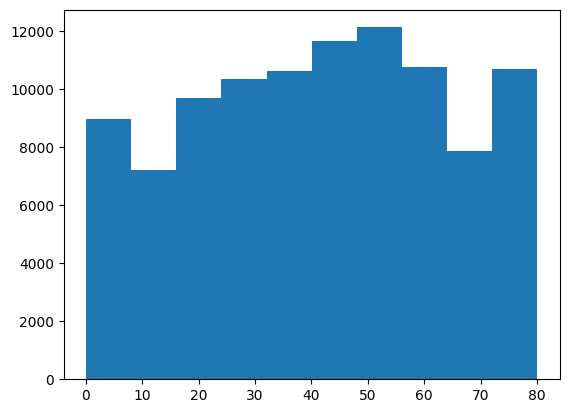

In [40]:
plt.hist(x=data['age'])
plt.show()

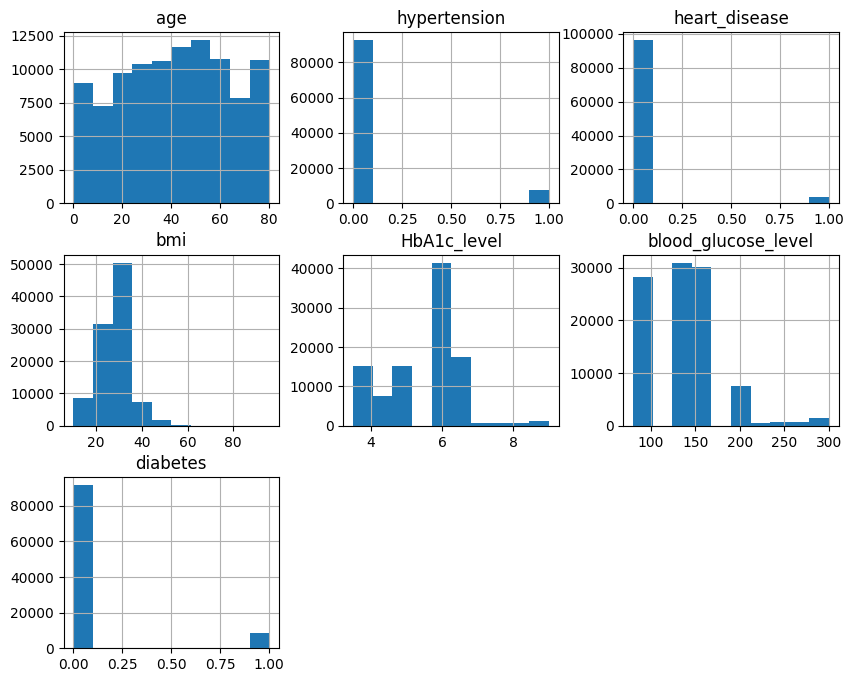

In [41]:
data.hist(figsize=(10, 8))

plt.show()

In [42]:
data['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

## Data Cleaning

In [43]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [44]:
data.duplicated().sum()

3854

### Drop Duplicates

In [45]:
data = data.drop_duplicates()

In [46]:
print('Duplicated: ', data.duplicated().sum())
print("Shape of dataset: ", data.shape)

Duplicated:  0
Shape of dataset:  (96146, 9)


In [47]:
# Droping rows where Gender is Other (since it is very less and uncertain)

data = data[data['gender'] != 'Other']

In [48]:
# Droping any remaining missing values
data = data.dropna()

In [49]:
# Since value of bmi is rarely over 60 in the graph let's drop those outliers

data = data[data['bmi'] <= 60]

In [50]:
# Applying a filter for Age column 
data = data[data['age'] >= 10]

In [51]:
print("Shape of the dataset after clearning: ", data.shape)

Shape of the dataset after clearning:  (86510, 9)


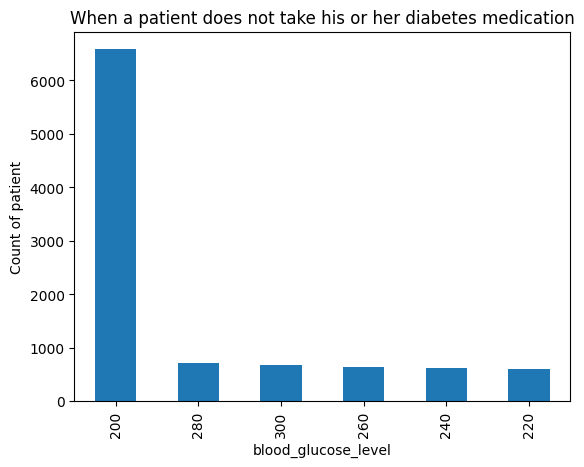

In [52]:
glucose_level_200 = data[data['blood_glucose_level'] >= 200]

glucose_level_200['blood_glucose_level'].value_counts().plot(kind='bar')
plt.title("When a patient does not take his or her diabetes medication")
plt.xlabel('blood_glucose_level')
plt.ylabel('Count of patient')
plt.show()

## Visualizations

C:\Users\satya\AppData\Local\Temp\ipykernel_13400\4276626932.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


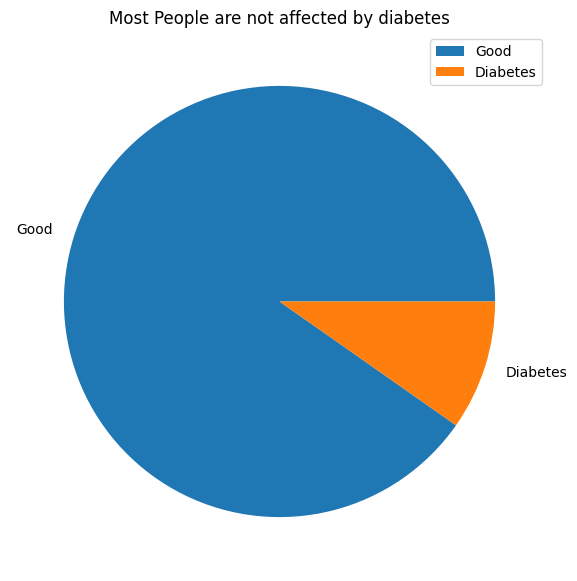

In [53]:



outcome = data['diabetes'].value_counts()
outcome.index = ['Good', 'Diabetes']
colors = ['#488A99', '#DADADA']

fig = plt.figure(figsize=(10,7))
plt.pie(outcome, labels=outcome.index)
plt.title("Most People are not affected by diabetes")
plt.legend()

fig.show()

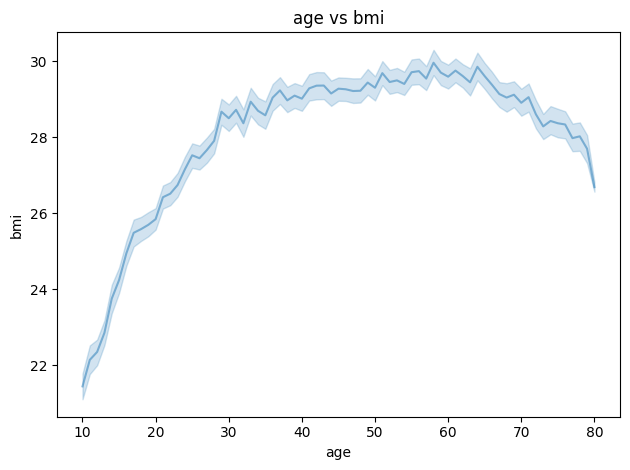

In [54]:
sns.lineplot(x='age', y='bmi', data=data, alpha=0.5)
plt.title('age vs bmi')
plt.tight_layout()
plt.show()

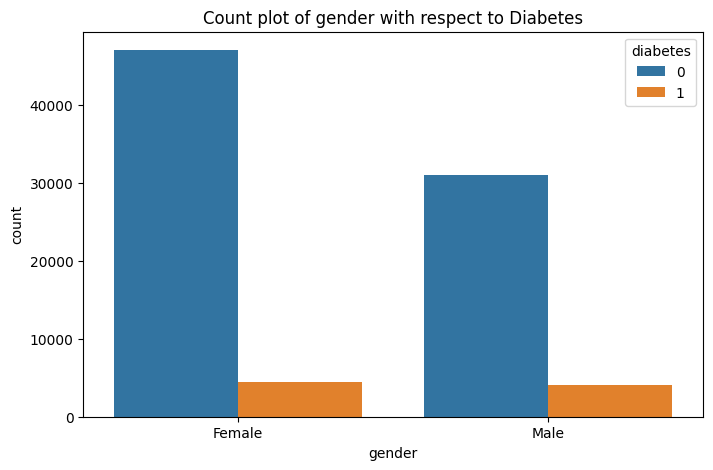

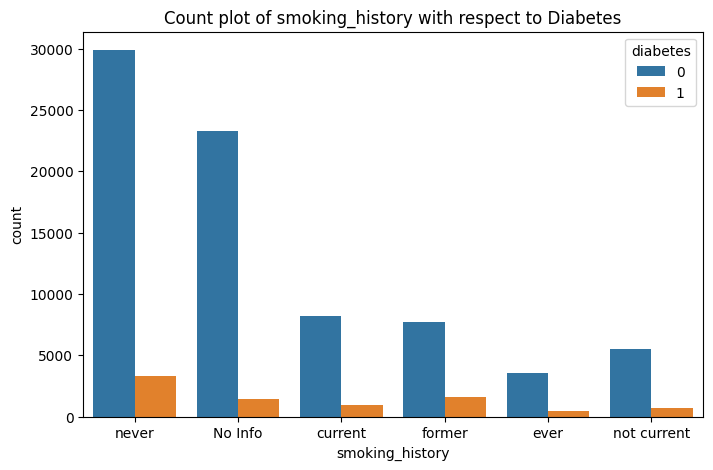

In [55]:
categorical_columns = ['gender','smoking_history']
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='diabetes', data=data)
    plt.title(f'Count plot of {column} with respect to Diabetes')
    plt.show()

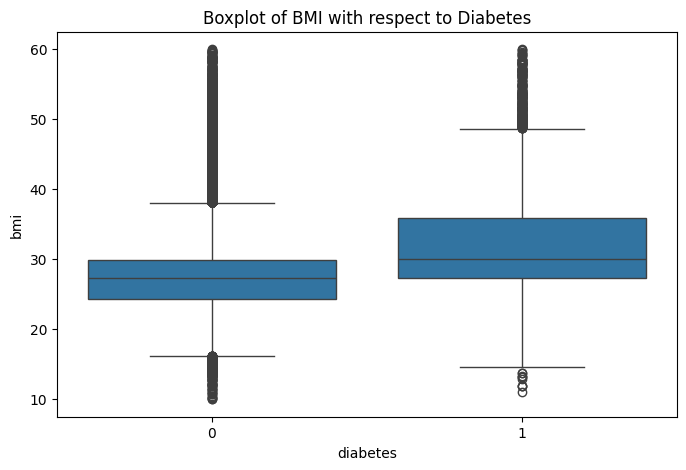

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='diabetes', y='bmi', data=data)
plt.title('Boxplot of BMI with respect to Diabetes')
plt.show()

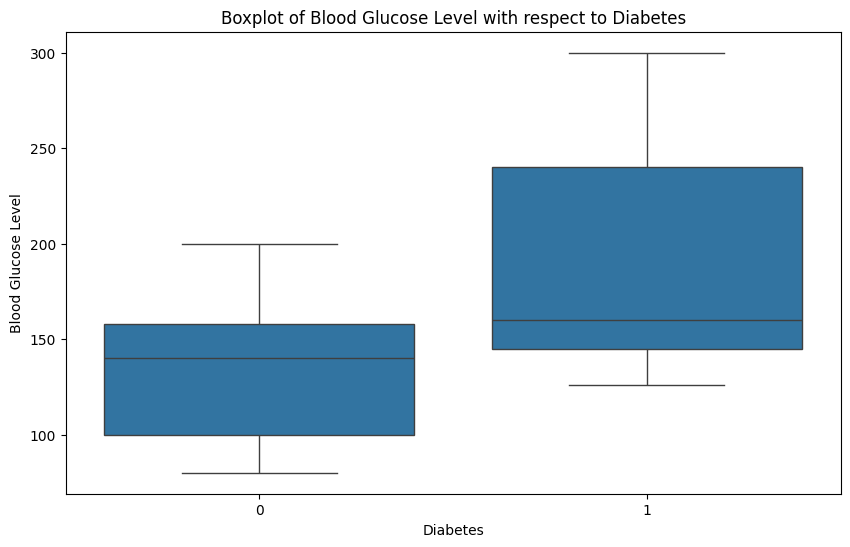

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Boxplot of Blood Glucose Level with respect to Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.show()

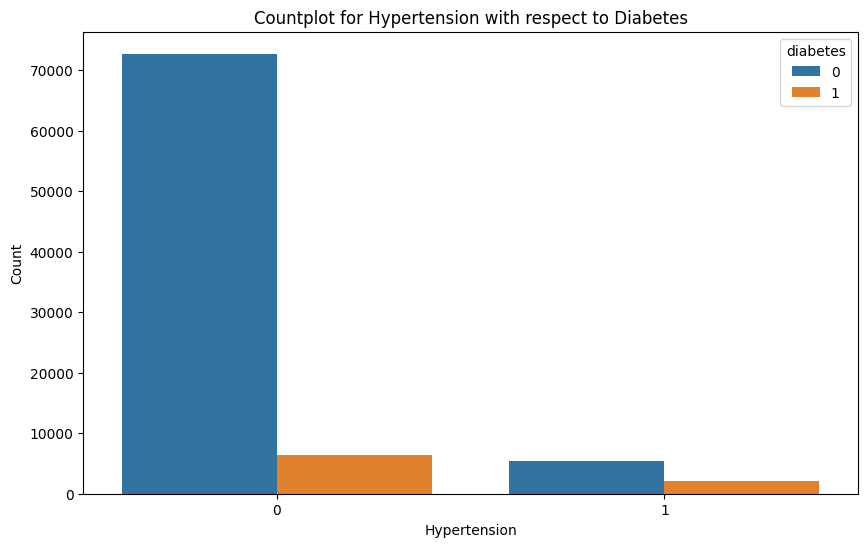

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='diabetes', data=data)
plt.title('Countplot for Hypertension with respect to Diabetes')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

### Data Preprocessing

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
label_encoder = LabelEncoder()

In [60]:
data['gender'] = label_encoder.fit_transform(data['gender'])
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])

Handling Data Imbalance....

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

X = data.drop(columns='diabetes').values
y = data['diabetes'].values

#Performing Split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Combine the features and target variable for the training set

train_data = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='target')], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['target'] == 0]
minority_class = train_data[train_data['target'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
balanced_data = pd.concat([majority_class, minority_upsampled])

# Separate features and target variable
X_balanced = balanced_data.drop('target', axis=1)
y_balanced = balanced_data['target']

Model


In [62]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier, Pool, cv
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier

Linear Regression

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


lr_model = LinearRegression()
lr_model.fit(X_balanced, y_balanced)

lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Mean Absolute Error: {mae:.2f}")

Linear Regression Mean Squared Error: 0.10
Linear Regression Mean Absolute Error: 0.26


Logistic Regression

In [64]:



logistic_model = LogisticRegression()
logistic_model.fit(X_balanced, y_balanced)

logistic_predictions = logistic_model.predict(X_test)


# Evaluate the model's performance
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))


Logistic Regression Accuracy: 0.88
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15633
           1       0.43      0.87      0.58      1669

    accuracy                           0.88     17302
   macro avg       0.71      0.87      0.75     17302
weighted avg       0.93      0.88      0.89     17302



c:\Users\satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


knn_pipeline = make_pipeline(KNeighborsClassifier())

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 10],  
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_balanced, y_balanced)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
knn_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, knn_pred)
report = classification_report(y_test, knn_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
Model Accuracy: 0.9167148306554156
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95     15633
           1       0.55      0.69      0.62      1669

    accuracy                           0.92     17302
   macro avg       0.76      0.82      0.78     17302
weighted avg       0.93      0.92      0.92     17302



Decision Tree

In [66]:
best_params = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       random_state=0)

dt_classifier.fit(X_balanced, y_balanced)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Model Accuracy: 0.9396601548953878
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     15633
           1       0.66      0.76      0.71      1669

    accuracy                           0.94     17302
   macro avg       0.82      0.86      0.84     17302
weighted avg       0.94      0.94      0.94     17302



Random Forest Classifier

In [67]:
random_f = RandomForestClassifier(random_state=42)

random_f.fit(X_balanced, y_balanced)
y_pred_rf = random_f.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy of Random Forest classifier:", accuracy_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)




Accuracy of Random Forest classifier: 0.960524794821408
Confusion Matrix for Random Forest:
[[15406   227]
 [  456  1213]]


In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest :")
print(class_report)

Classification Report for Random Forest :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15633
           1       0.84      0.73      0.78      1669

    accuracy                           0.96     17302
   macro avg       0.91      0.86      0.88     17302
weighted avg       0.96      0.96      0.96     17302



SGDC Classifier

In [69]:
from sklearn.linear_model import SGDClassifier


sgdc_classifier = SGDClassifier(random_state=42)
sgdc_classifier.fit(X_balanced, y_balanced)


sgdc_pred = sgdc_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, sgdc_pred)
report = classification_report(y_test, sgdc_pred)

print("SGDClassifier Model Accuracy:", accuracy)
print("Classification Report:\n", report)

SGDClassifier Model Accuracy: 0.8763148768928447
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     15633
           1       0.43      0.86      0.57      1669

    accuracy                           0.88     17302
   macro avg       0.71      0.87      0.75     17302
weighted avg       0.93      0.88      0.89     17302



XGBoost Classifier

In [70]:
%pip install --user xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from xgboost import XGBClassifier
# Create and train the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42,max_features='sqrt', n_estimators=100, max_depth=10)
xgb_classifier.fit(X_balanced, y_balanced)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("XGBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)

c:\Users\satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:08:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.9415096520633452
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     15633
           1       0.67      0.78      0.72      1669

    accuracy                           0.94     17302
   macro avg       0.82      0.87      0.84     17302
weighted avg       0.95      0.94      0.94     17302



Catboost Classifier

In [73]:
pip install catboost


   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 262.6 kB/s eta 0:06:25
   ---------------------------------------- 0.0/101.1 MB 281.8 kB/s eta 0:05:59
   ---------------------------------------- 0.1/101.1 MB 654.9 kB/s eta 0:02:35
   ---------------------------------------- 0.3/101.1 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.6/101.1 MB 2.1 MB/s eta 0:00:49
   ---------------------------------------- 1.0/101.1 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 1.2/101.1 MB 3.4 MB/s eta 0:00:30
    --------------------------------------- 1.3/101.1 MB 3.4 MB/s eta 0:00:30
    --------------------------------------- 1.5/101.1 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.6/101.1 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.6/101.1 MB 3.5 MB/s eta 0:


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the CatBoost classifier with specified parameters
catboost_classifier = CatBoostClassifier(random_seed=42, logging_level='Silent', learning_rate=0.1, depth=10, subsample=0.8)

# Fit the model on the training data
catboost_classifier.fit(X_balanced, y_balanced)

# Predict on the test set
y_pred = catboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("CatBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)


CatBoost Model Accuracy: 0.9497167957461565
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     15633
           1       0.73      0.77      0.75      1669

    accuracy                           0.95     17302
   macro avg       0.85      0.87      0.86     17302
weighted avg       0.95      0.95      0.95     17302



Gradient Boosting Classifier

In [75]:
gradientBoost = GradientBoostingClassifier(random_state=42)
gradientBoost.fit(X_balanced, y_balanced)

GradientBoostingClassifier(random_state=42)

In [76]:
y_pred = gradientBoost.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(matrix)


Accuracy: 0.8938850999884407
Confusion Matrix:
[[13934  1699]
 [  137  1532]]


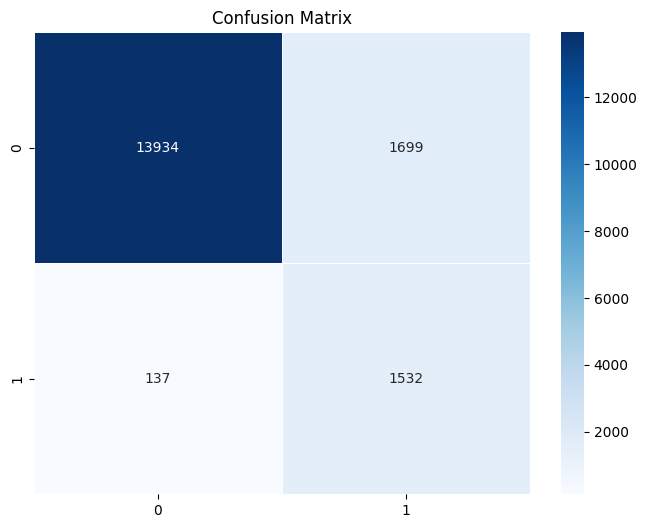

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', linewidths=.5)
plt.title('Confusion Matrix')
plt.show()

In [79]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.4741566078613432
Recall: 0.9179149191132414


LGBM Classifier

In [81]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.Collecting lightgbm
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 581.0 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 1.2 MB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.4 MB 2.0 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 2.7 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 3.4 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.4 MB/s eta 0:00:00




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
from lightgbm import LGBMClassifier
lgb_classifier = LGBMClassifier(random_state=42)

lgb_classifier.fit(X_balanced, y_balanced)

# Predict on the test set
y_pred = lgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("LightGBM Model Accuracy:", accuracy)
print("Classification Report:\n", report)

[LightGBM] [Info] Number of positive: 62454, number of negative: 62454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.130753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 124908, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Model Accuracy: 0.9063692058721535
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     15633
           1       0.51      0.90      0.65      1669

    accuracy                           0.91     17302
   macro avg       0.75      0.90      0.80     17302
weighted avg       0.94      0.91      0.92     17302



ADA Boost Algorithm

In [83]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier()

ada_classifier.fit(X_balanced, y_balanced)

ada_pred = ada_classifier.predict(X_test)

accuracy = accuracy_score(y_test, ada_pred)
report = classification_report(y_test, ada_pred)

print("AdaBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)

c:\Users\satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model Accuracy: 0.9000693561437985
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     15633
           1       0.49      0.91      0.64      1669

    accuracy                           0.90     17302
   macro avg       0.74      0.90      0.79     17302
weighted avg       0.94      0.90      0.91     17302



Bagging Classification

In [84]:
bagging = BaggingClassifier(random_state=10)

bagging.fit(X_balanced, y_balanced)

bagging_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, bagging_pred)
report = classification_report(y_test, bagging_pred)

print("AdaBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)

AdaBoost Model Accuracy: 0.956652410125997
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     15633
           1       0.81      0.72      0.76      1669

    accuracy                           0.96     17302
   macro avg       0.89      0.85      0.87     17302
weighted avg       0.95      0.96      0.96     17302



## Evaluation

ROC_AUC Metrics

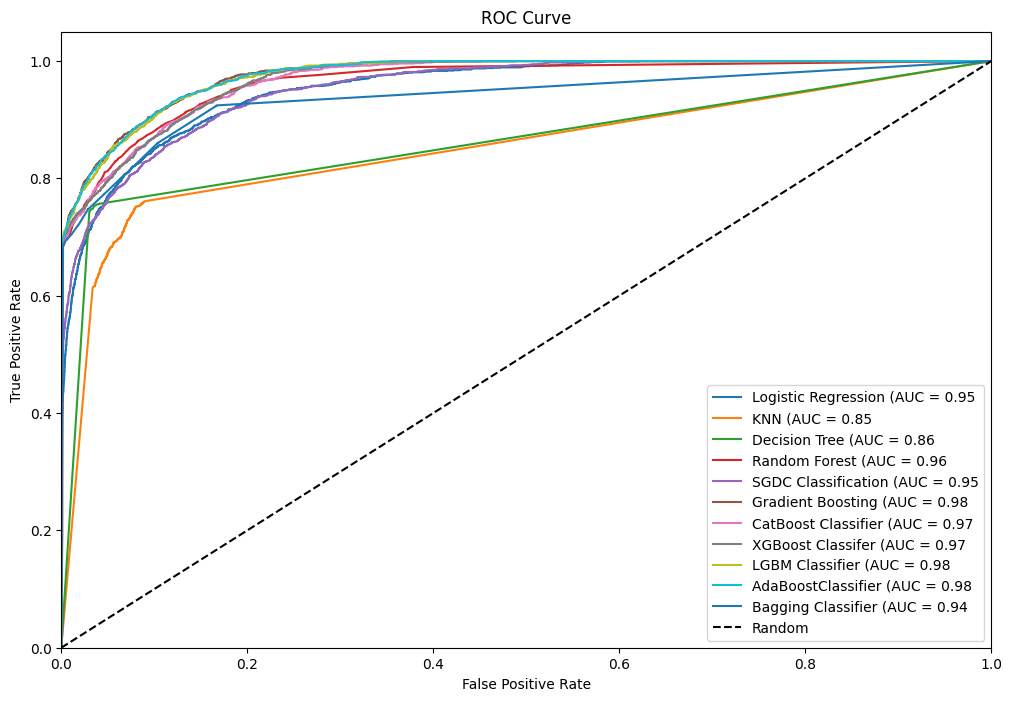

In [85]:

from sklearn.metrics import roc_auc_score, roc_curve


classifiers = [logistic_model, best_estimator, dt_classifier, random_f,sgdc_classifier, gradientBoost, catboost_classifier, xgb_classifier, lgb_classifier, ada_classifier, bagging]
classifier_names = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest","SGDC Classification", "Gradient Boosting", "CatBoost Classifier", "XGBoost Classifer", "LGBM Classifier"
                    ,"AdaBoostClassifier", "Bagging Classifier"]

# Create a function to plot ROC curve and calculate AUC
def plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test):
    plt.figure(figsize=(12, 8))
    for classifier, name in zip(classifiers, classifier_names):
        if hasattr(classifier, 'predict_proba'):  # Check if the classifier has predict_proba method
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        else:
            try:
                y_pred_prob = classifier.decision_function(X_test)
            except AttributeError:
                raise AttributeError(f"{name} does not have predict_proba or decision_function method.")

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f}")

    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves and calculate AUC for classifiers excluding Linear Regression
plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test)

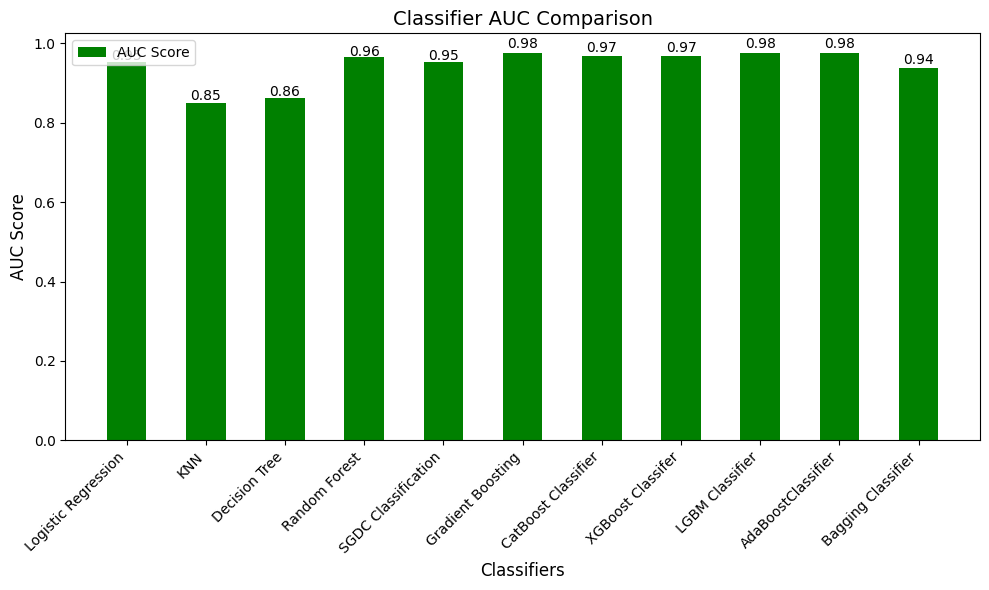

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve


classifiers = [logistic_model, best_estimator, dt_classifier, random_f, sgdc_classifier, gradientBoost, catboost_classifier, xgb_classifier, lgb_classifier, ada_classifier, bagging]
classifier_names = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SGDC Classification", "Gradient Boosting", "CatBoost Classifier", "XGBoost Classifer", "LGBM Classifier", "AdaBoostClassifier", "Bagging Classifier"]

# Create a function to plot AUC scores as a bar chart
def plot_auc_scores(classifiers, classifier_names, X_test, y_test):
    auc_scores = []
    for classifier, name in zip(classifiers, classifier_names):
        if hasattr(classifier, 'predict_proba'):
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        else:
            try:
                y_pred_prob = classifier.decision_function(X_test)
            except AttributeError:
                raise AttributeError(f"{name} does not have predict_proba or decision_function method.")

        auc = roc_auc_score(y_test, y_pred_prob)
        auc_scores.append(auc)

    # Plotting the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.5
    index = np.arange(len(classifier_names))

    bars = plt.bar(index, auc_scores, bar_width, label='AUC Score', color='green')

    plt.xlabel('Classifiers', fontsize=12)
    plt.ylabel('AUC Score', fontsize=12)
    plt.title('Classifier AUC Comparison', fontsize=14)
    plt.xticks(index, classifier_names, rotation=45, ha="right")
    plt.legend()

    # Display the AUC scores on top of the bars
    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plot AUC scores for classifiers
plot_auc_scores(classifiers, classifier_names, X_test, y_test)


Precision


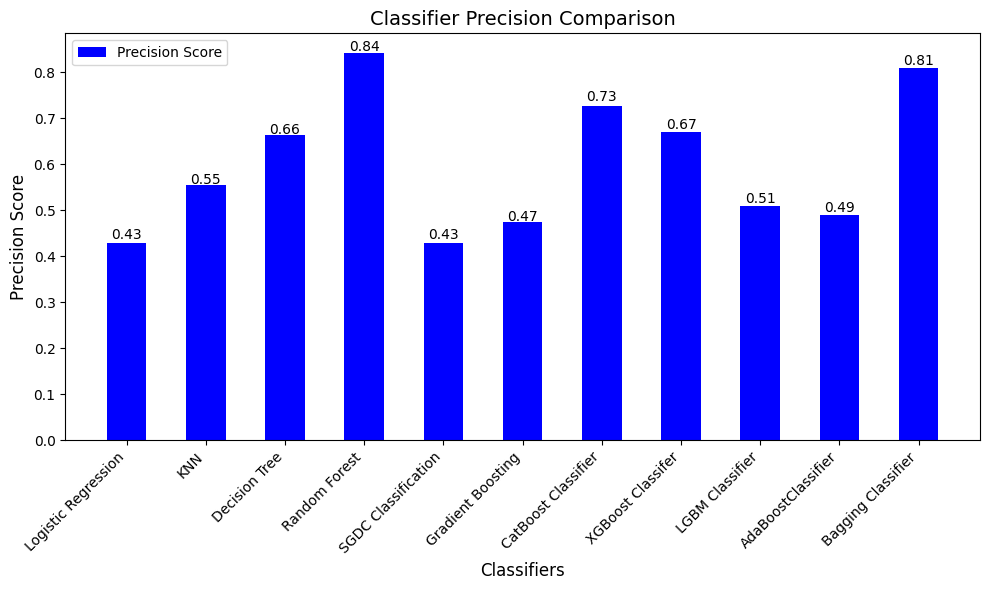

In [87]:
from sklearn.metrics import precision_score

classifiers = [logistic_model, best_estimator, dt_classifier, random_f, sgdc_classifier, gradientBoost, catboost_classifier, xgb_classifier, lgb_classifier, ada_classifier, bagging]
classifier_names = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SGDC Classification", "Gradient Boosting", "CatBoost Classifier", "XGBoost Classifer", "LGBM Classifier", "AdaBoostClassifier", "Bagging Classifier"]


def plot_precision_scores(classifiers, classifier_names, X_test, y_test):
    precision_scores = []
    for classifier, name in zip(classifiers, classifier_names):
        y_pred = classifier.predict(X_test)
        precision = precision_score(y_test, y_pred)
        precision_scores.append(precision)

    # Plotting the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.5
    index = np.arange(len(classifier_names))

    bars = plt.bar(index, precision_scores, bar_width, label='Precision Score', color='blue')

    plt.xlabel('Classifiers', fontsize=12)
    plt.ylabel('Precision Score', fontsize=12)
    plt.title('Classifier Precision Comparison', fontsize=14)
    plt.xticks(index, classifier_names, rotation=45, ha="right")
    plt.legend()

    # Display the precision scores on top of the bars
    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plot precision scores for classifiers
plot_precision_scores(classifiers, classifier_names, X_test, y_test)


Recall

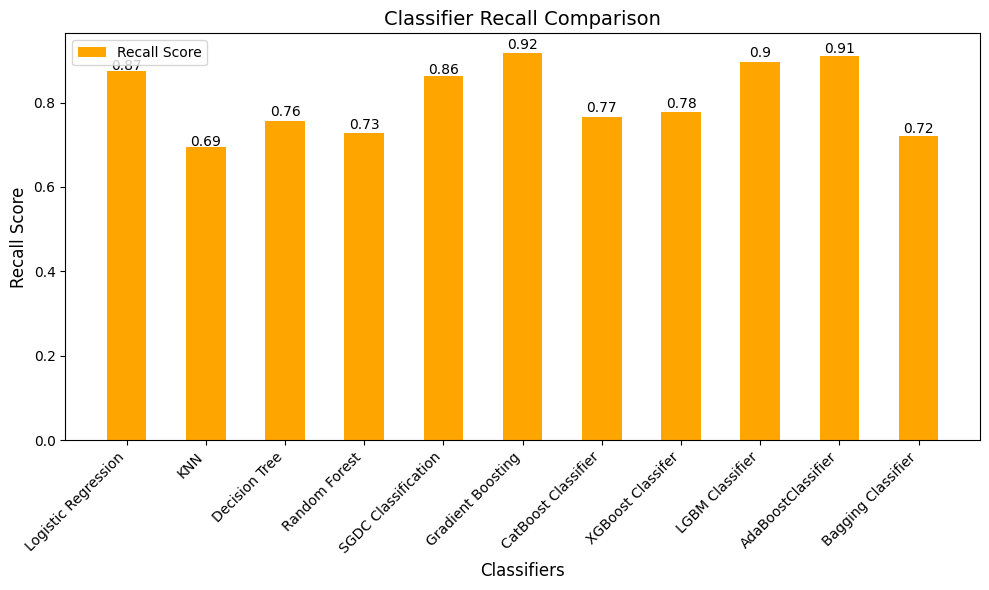

In [88]:
from sklearn.metrics import recall_score


def plot_recall_scores(classifiers, classifier_names, X_test, y_test):
    recall_scores = []
    for classifier, name in zip(classifiers, classifier_names):
        y_pred = classifier.predict(X_test)
        recall = recall_score(y_test, y_pred)
        recall_scores.append(recall)

    # Plotting the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.5
    index = np.arange(len(classifier_names))

    bars = plt.bar(index, recall_scores, bar_width, label='Recall Score', color='orange')

    plt.xlabel('Classifiers', fontsize=12)
    plt.ylabel('Recall Score', fontsize=12)
    plt.title('Classifier Recall Comparison', fontsize=14)
    plt.xticks(index, classifier_names, rotation=45, ha="right")
    plt.legend()

   
    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plot recall scores for classifiers
plot_recall_scores(classifiers, classifier_names, X_test, y_test)


F-measure

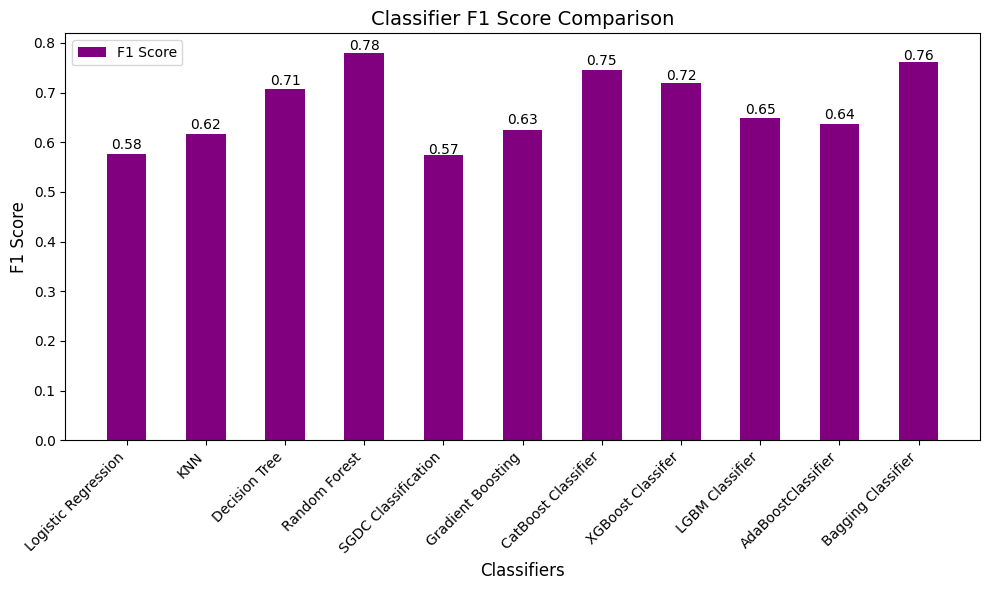

In [89]:
from sklearn.metrics import f1_score

# Create a function to plot F1 scores as a bar chart
def plot_f1_scores(classifiers, classifier_names, X_test, y_test):
    f1_scores = []
    for classifier, name in zip(classifiers, classifier_names):
        y_pred = classifier.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)

    # Plotting the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.5
    index = np.arange(len(classifier_names))

    bars = plt.bar(index, f1_scores, bar_width, label='F1 Score', color='purple')

    plt.xlabel('Classifiers', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    plt.title('Classifier F1 Score Comparison', fontsize=14)
    plt.xticks(index, classifier_names, rotation=45, ha="right")
    plt.legend()

    # Display the F1 scores on top of the bars
    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plot F1 scores for classifiers
plot_f1_scores(classifiers, classifier_names, X_test, y_test)


Accuracy

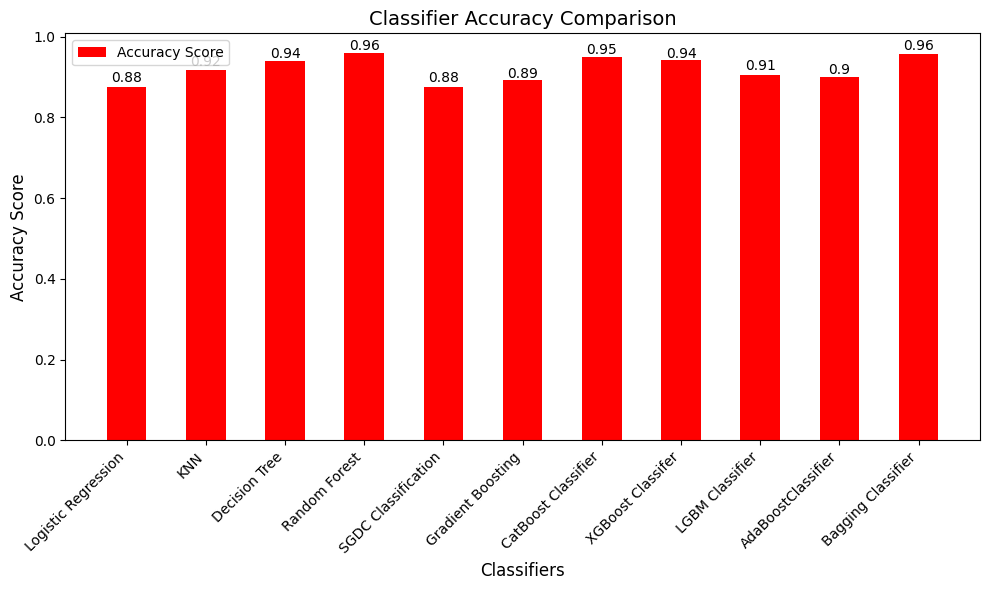

In [90]:
from sklearn.metrics import accuracy_score

# Create a function to plot accuracy scores as a bar chart
def plot_accuracy_scores(classifiers, classifier_names, X_test, y_test):
    accuracy_scores = []
    for classifier, name in zip(classifiers, classifier_names):
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Plotting the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.5
    index = np.arange(len(classifier_names))

    bars = plt.bar(index, accuracy_scores, bar_width, label='Accuracy Score', color='red')

    plt.xlabel('Classifiers', fontsize=12)
    plt.ylabel('Accuracy Score', fontsize=12)
    plt.title('Classifier Accuracy Comparison', fontsize=14)
    plt.xticks(index, classifier_names, rotation=45, ha="right")
    plt.legend()

    # Display the accuracy scores on top of the bars
    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plot accuracy scores for classifiers
plot_accuracy_scores(classifiers, classifier_names, X_test, y_test)


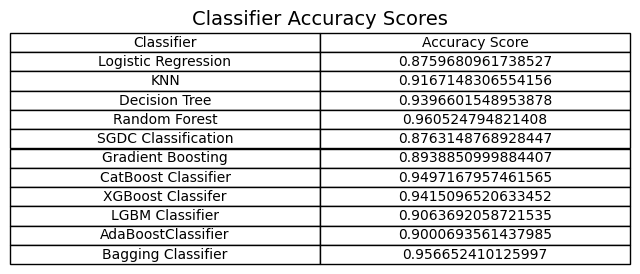

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a function to display accuracy scores in a table
def display_accuracy_scores_table(classifiers, classifier_names, X_test, y_test):
    accuracy_scores = []
    for classifier, name in zip(classifiers, classifier_names):
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Create a DataFrame for the table
    df = pd.DataFrame({
        'Classifier': classifier_names,
        'Accuracy Score': accuracy_scores
    })

    # Display the table
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.axis('off')  # Hide the axes
    table = plt.table(cellText=df.values,
                      colLabels=df.columns,
                      cellLoc='center',
                      loc='center',
                      bbox=[0, 0, 1, 1])
    plt.title('Classifier Accuracy Scores', fontsize=14)
    plt.show()

# Assuming classifiers and classifier_names are defined, and X_test, y_test are available
display_accuracy_scores_table(classifiers, classifier_names, X_test, y_test)
